In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract
from PIL import Image
from sklearn.cluster import KMeans
import face_recognition

## Featurization

### Canny Edge Detection

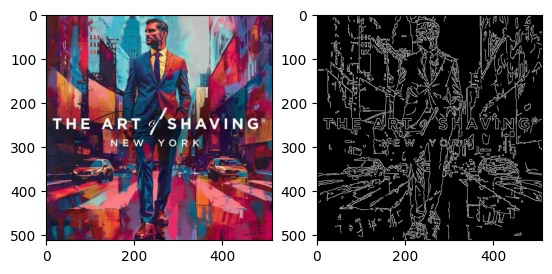

In [3]:
# img_path = "./data_take_home/athenaclub/tiled/432264164_436556908755822_8389967406275613426_n.jpg"
# img_path = "./data_take_home/athenaclub/tiled/433518313_441880671611920_3176814575389989131_n.jpg"
# img_path = "./data_take_home/manscaped/tiled/400706055_866753091420740_7370108099905309257_n.jpg"
img_path = "./data_take_home/theartofshaving/tiled/436163343_1021277309419932_4326491977803247855_n.jpg"
# img_path = "./data_take_home/shopmando/tiled/424613350_950121583403596_8428290237778749168_n.jpg"

img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
col_img = cv.imread(img_path)
col_img = cv.cvtColor(col_img, cv.COLOR_BGR2RGB)
edges = cv.Canny(img,100,200)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(col_img)
ax2.imshow(edges, cmap='gray')

In [189]:
edges.mean()

12.227439880371094

### Face Detection

In [5]:
image = face_recognition.load_image_file(img_path)
face_locations = face_recognition.face_locations(image)
face_locations

[]

In [14]:
model_path = './dl_models/blaze_face_short_range.tflite'

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceDetector object.
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.FaceDetectorOptions(base_options=base_options)
detector = vision.FaceDetector.create_from_options(options)

image = mp.Image.create_from_file(img_path)
detection_result = detector.detect(image)


I0000 00:00:1716526160.880920  705977 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-20.6.4), renderer: Intel(R) Iris(TM) Plus Graphics 640


In [24]:
detection_result.detections[0].categories[0].score

0.5114415287971497

### Color Clustering Variance

measure within-cluster variance of three k-means clusters

In [190]:
col_img = cv.imread(img_path)
col_img.shape
pixels = col_img.reshape(-1, 3)
model = KMeans(n_clusters=4)
assignments = model.fit_predict(pixels)

In [191]:
cluster_vars = np.zeros((4, ))
for k in range(4):
    cluster = pixels[assignments == k, :]
    center = model.cluster_centers_[k, :]
    dists = np.sum((cluster - center[np.newaxis, :])**2, axis=1)
    cluster_vars[k] = dists.mean()

cluster_vars.sum()

3150.3232009484077

### Bag Of Words

word counts for all visible text in the add: title, body, call to action, ocr. make sure to omit company-specific words

In [192]:
ocr_text = pytesseract.image_to_string(Image.open(img_path)).replace("\n", " ").strip()
ocr_text

''

## Analysis

apply clustering or QDA on continuous, image features that may be reasonably modeled by gaussians. apply logistic regression on categorical features to discover important words.